# Flight Fare Prediction


### Aim

### About the dataset
This data is collected from Kaggle datasets. This dataset contains flight details such as Date of booking, Date of travel, Airline and class, Departure time and source, Arrival time and destination, Duration, Total stops, Price. These data are related to the domestic flights departing from the top 7 busy airports of India.

### Agenda
- Data collection
- Data exploration
- Data cleaning
- Explanatory data analysis
- Data preprocessing
- Modeling

# Data collection

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Scraped_dataset.csv')

# Data exploration

In [3]:
# for reusabilty
df = data.copy()

data.head()

Date of Booking Date of Journey                Airline-Class Departure Time  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY   20:00\nDelhi   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY   23:00\nDelhi   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY   22:30\nDelhi   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY   18:50\nDelhi   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY   20:00\nDelhi   

    Arrival Time Duration Total Stops  Price  
0  22:05\nMumbai  02h 05m    non-stop  5,335  
1  01:20\nMumbai  02h 20m    non-stop  5,899  
2  00:40\nMumbai  02h 10m    non-stop  5,801  
3  20:55\nMumbai  02h 05m    non-stop  5,794  
4  22:10\nMumbai  02h 10m    non-stop  5,955

In [4]:
print(df.shape)
print(df.info())

(452088, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date of Booking  452088 non-null  object
 1   Date of Journey  452088 non-null  object
 2   Airline-Class    452088 non-null  object
 3   Departure Time   452088 non-null  object
 4   Arrival Time     452088 non-null  object
 5   Duration         452088 non-null  object
 6   Total Stops      452088 non-null  object
 7   Price            452088 non-null  object
dtypes: object(8)
memory usage: 27.6+ MB
None


- date of journey -- day of journey (most travelled day of the week)
- gap -- date of journey - date of booking
- airline -- airline + flight code + class
- departure -- time + place
- arrival -- time + place

# Data cleaning

In [5]:
import re

In [6]:
df.rename(columns={'Date of Booking':'Date_of_Booking'},inplace=True)
df['Date_of_Booking'] = pd.to_datetime(df['Date_of_Booking'])

In [7]:
df.rename(columns={'Date of Journey':'Day_of_Journey'},inplace=True)
df['Day_of_Journey'] = pd.to_datetime(df['Day_of_Journey'])

def date_to_day(x):
    from datetime import datetime
    days = ('Monday', 'Tuesday', 'Wednesday', 'Thursay', 'Friday','Saturday', 'Sunday')
    return days[x.weekday()]

df.insert(list(df.columns).index('Day_of_Journey')+1,'Gap',df['Day_of_Journey']-df['Date_of_Booking'])

def timedelta_to_days(x):
    return int(str(x).split(' days')[0])

df['Gap'] = df['Gap'].apply(timedelta_to_days)
df['Day_of_Journey'] = df['Day_of_Journey'].apply(date_to_day)

In [8]:
Airline = []
Flight_code = []
Class = []

def split_airline_class(x):
    Airline.append(x.split('\n')[0])
    Flight_code.append(x.split('\n')[1])
    Class.append(x.split('\n')[2])

df['Airline-Class'].apply(split_airline_class)

df.insert(2,'Airline',Airline)
df.insert(3,'Flight_code',Flight_code)
df.insert(4,'Class',Class)

df.drop('Airline-Class',axis=1,inplace=True)

In [9]:
df.rename(columns={'Departure Time':'Departure_time'},inplace=True)

departure = []

def split_departure_time(x):
    time, place = x.split('\n')
    departure.append(place)
    return time

df['Departure_time'] = df['Departure_time'].apply(split_departure_time)

df.insert(list(df.columns).index('Departure_time')+1,'Departure',departure)

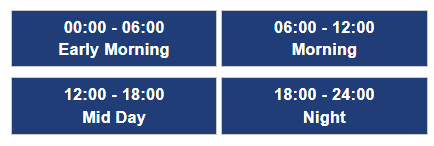

In [10]:
def time_classification(x):
    h, m = [int(i) for i in x.split(':')]
    time = h+m/60
    
    if time>18: 
        return 'Night'
    elif time>12: 
        return 'Mid Day'
    elif time>6: 
        return 'Morning'
    else: 
        return 'Early Morning'

df['Departure_time'] = df['Departure_time'].apply(time_classification)

In [11]:
df.rename(columns={'Arrival Time':'Arrival_time'},inplace=True)

arrival = []

def split_arrival_time(x):
    time, place = x.split('\n')
    arrival.append(place)
    return time

df['Arrival_time'] = df['Arrival_time'].apply(split_arrival_time)

df.insert(list(df.columns).index('Arrival_time')+1,'Arrival',arrival)

df['Arrival_time'] = df['Arrival_time'].apply(time_classification)

In [12]:
def duration_hrs(x):
    x = re.sub('[a-z]','',x).split()
    return round(int(x[0])+int(x[1])/60,2)

df['Duration'] = df['Duration'].apply(duration_hrs)

In [13]:
df.rename(columns={'Total Stops':'Total_stops'},inplace=True)

def clean_stops(x):
    x = re.sub('\D','',x)
    if x.isdigit():
        return int(x)
    else:
        return 0

df['Total_stops'] = df['Total_stops'].apply(clean_stops)

In [14]:
def clean_num(x):
    return int(re.sub('\D','',x))  
    
df['Price'] = df['Price'].apply(clean_num)

# Data Exploration

In [15]:
df.tail()

Date_of_Booking Day_of_Journey   Airline Flight_code     Class  Gap  \
452083      2023-01-15       Saturday  Vistara       UK-926  BUSINESS  139   
452084      2023-01-15       Saturday  Vistara       UK-918  BUSINESS  139   
452085      2023-01-15       Saturday  Vistara       UK-918  BUSINESS  139   
452086      2023-01-15       Saturday  Vistara       UK-946  BUSINESS  139   
452087      2023-01-15       Saturday  Vistara       UK-946  BUSINESS  139   

       Departure_time  Departure Arrival_time  Arrival  Duration  Total_stops  \
452083        Morning  Ahmedabad        Night  Chennai     13.08            1   
452084  Early Morning  Ahmedabad      Mid Day  Chennai     11.25            1   
452085  Early Morning  Ahmedabad      Mid Day  Chennai     11.25            1   
452086        Morning  Ahmedabad        Night  Chennai     11.17            1   
452087        Morning  Ahmedabad        Night  Chennai     11.17            1   

        Price  
452083  65028  
452084  69254  
452085  69254  
452086  72980  
452087  72980

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date_of_Booking  452088 non-null  datetime64[ns]
 1   Day_of_Journey   452088 non-null  object        
 2   Airline          452088 non-null  object        
 3   Flight_code      452088 non-null  object        
 4   Class            452088 non-null  object        
 5   Gap              452088 non-null  int64         
 6   Departure_time   452088 non-null  object        
 7   Departure        452088 non-null  object        
 8   Arrival_time     452088 non-null  object        
 9   Arrival          452088 non-null  object        
 10  Duration         452088 non-null  float64       
 11  Total_stops      452088 non-null  int64         
 12  Price            452088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 44.8+ 

In [17]:
df.select_dtypes(include=object).describe()

Day_of_Journey   Airline Flight_code    Class Departure_time Departure  \
count          452088    452088      452088   452088         452088    452088   
unique              7         9        1405        4              4         7   
top            Monday  Vistara       UK-936  ECONOMY        Morning     Delhi   
freq            81118    231490        5506   252033         180832     83153   

       Arrival_time Arrival  
count        452088  452088  
unique            4       7  
top           Night  Mumbai  
freq         198742   82995

In [18]:
df.select_dtypes(exclude=object).describe()

Gap       Duration    Total_stops          Price
count  452088.000000  452088.000000  452088.000000  452088.000000
mean       59.269952      12.349203       0.953390   22840.100890
std        78.455677       7.431496       0.424473   20307.963002
min       -13.000000       0.750000       0.000000    1307.000000
25%        11.000000       6.580000       1.000000    8762.750000
50%        34.000000      11.330000       1.000000   13407.000000
75%        47.000000      16.500000       1.000000   35587.000000
max       321.000000      43.580000       2.000000  143019.000000

In [19]:
print('Column'.ljust(18),'Unique values')
print('--'*18)
for i in df.columns:
    print(f'{i:18} {df[i].nunique()}')

Column             Unique values
------------------------------------
Date_of_Booking    1
Day_of_Journey     7
Airline            9
Flight_code        1405
Class              4
Gap                50
Departure_time     4
Departure          7
Arrival_time       4
Arrival            7
Duration           482
Total_stops        3
Price              20781


In [20]:
cat = []; con = []

for i in df.columns:
    if df[i].nunique()<10:
        cat.append(i)
    else:
        con.append(i)

print('Categorical:\n',cat)
print('Continuous:\n',con)

Categorical:
 ['Date_of_Booking', 'Day_of_Journey', 'Airline', 'Class', 'Departure_time', 'Departure', 'Arrival_time', 'Arrival', 'Total_stops']
Continuous:
 ['Flight_code', 'Gap', 'Duration', 'Price']


In [21]:
for i in cat:
    print('Column:',i)
    print('Unique values:',df[i].unique())
    print('--'*18)

Column: Date_of_Booking
Unique values: ['2023-01-15T00:00:00.000000000']
------------------------------------
Column: Day_of_Journey
Unique values: ['Monday' 'Tuesday' 'Wednesday' 'Thursay' 'Friday' 'Saturday' 'Sunday']
------------------------------------
Column: Airline
Unique values: ['SpiceJet ' 'Indigo ' 'GO FIRST ' 'Air India ' 'AirAsia ' 'Vistara '
 'AkasaAir ' 'AllianceAir ' 'StarAir ']
------------------------------------
Column: Class
Unique values: ['ECONOMY' 'PREMIUMECONOMY' 'BUSINESS' 'FIRST']
------------------------------------
Column: Departure_time
Unique values: ['Night' 'Early Morning' 'Mid Day' 'Morning']
------------------------------------
Column: Departure
Unique values: ['Delhi' 'Mumbai' 'Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Ahmedabad']
------------------------------------
Column: Arrival_time
Unique values: ['Night' 'Early Morning' 'Morning' 'Mid Day']
------------------------------------
Column: Arrival
Unique values: ['Mumbai' 'Bangalore' 'Hyderabad' '

Date_of_Booking has only the same value throughout the dataset. Hence it doesn't have any emphasis and can be dropped
Likewise, Flight_code also doens't derve much purpose in prediction as it is continuous data of categorical nature

In [22]:
df.drop('Date_of_Booking',axis=1,inplace=True)
cat.remove('Date_of_Booking')

In [23]:
df.drop('Flight_code',axis=1,inplace=True)
con.remove('Flight_code')

# Explanatory data analysis

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
print(cat)

['Day_of_Journey', 'Airline', 'Class', 'Departure_time', 'Departure', 'Arrival_time', 'Arrival', 'Total_stops']


In [26]:
for i in cat:
    print(i)
    print(df[i].value_counts().sort_values(ascending=False))
    print('--'*20)

Day_of_Journey
Monday       81118
Tuesday      73013
Saturday     63891
Friday       63752
Thursay      63594
Wednesday    53688
Sunday       53032
Name: Day_of_Journey, dtype: int64
----------------------------------------
Airline
Vistara         231490
Air India       119841
Indigo           65659
AirAsia          15764
GO FIRST         10786
SpiceJet          5863
AkasaAir          2230
AllianceAir        393
StarAir             62
Name: Airline, dtype: int64
----------------------------------------
Class
ECONOMY           252033
BUSINESS          126834
PREMIUMECONOMY     73077
FIRST                144
Name: Class, dtype: int64
----------------------------------------
Departure_time
Morning          180832
Night            124994
Mid Day          117894
Early Morning     28368
Name: Departure_time, dtype: int64
----------------------------------------
Departure
Delhi        83153
Mumbai       80723
Bangalore    73375
Hyderabad    56657
Chennai      56514
Kolkata      55560
Ahmedaba

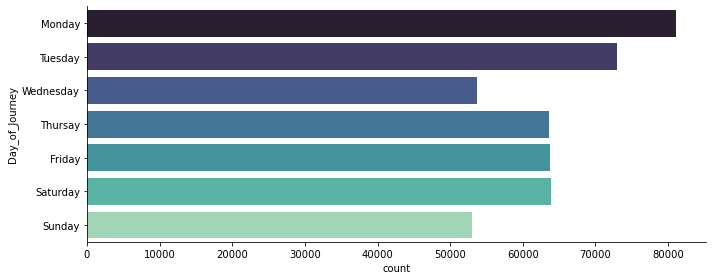

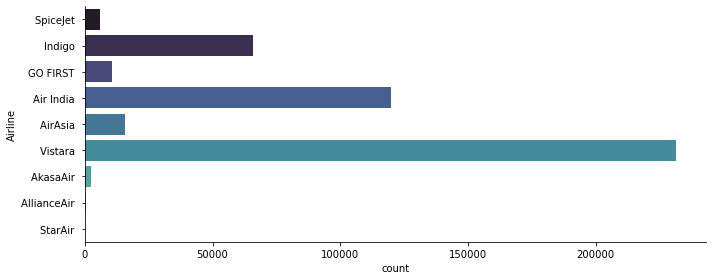

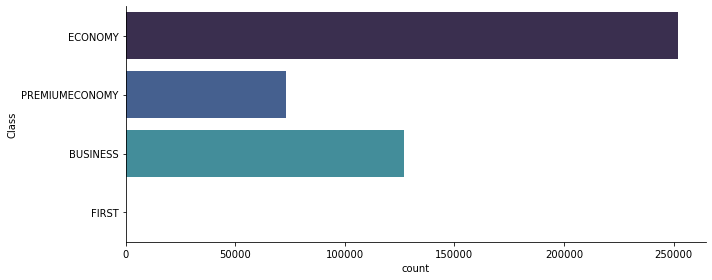

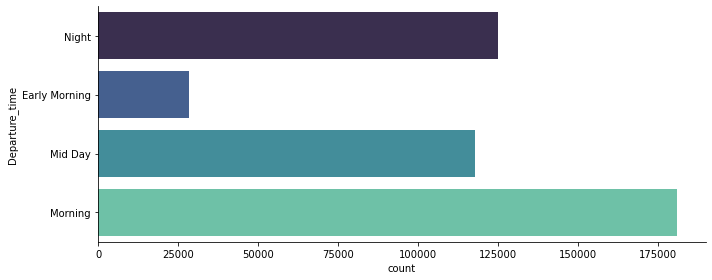

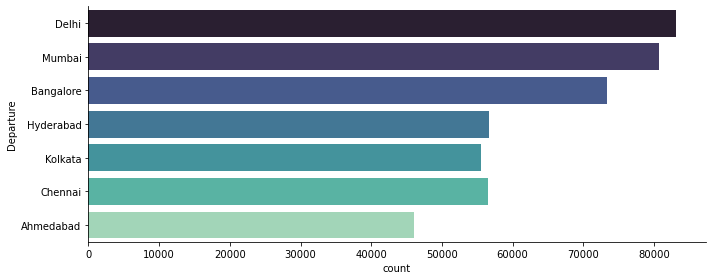

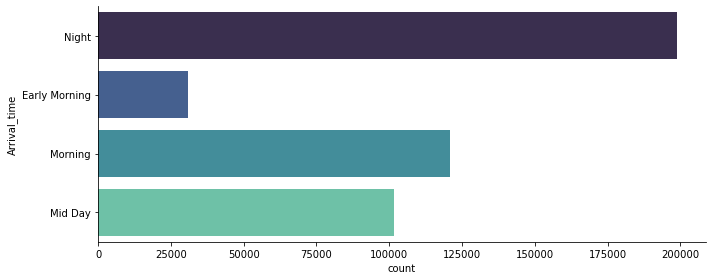

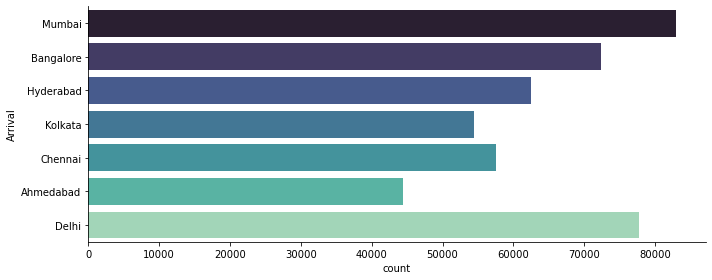

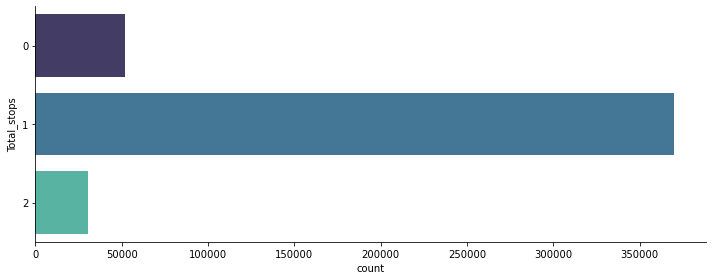

In [27]:
for i in cat:
    sns.catplot(data=df,y=i,kind='count',height=4,aspect=2.5,palette='mako')

#### Observation
- Most bookings to travel on Monday and least on Sunday
- Most bookings to travel by Vistara airline
- Most bookings to travel in Economy class
- Most bookings to travel depart in the Morning(6:00-12:00)
- Most bookings to travel from Delhi 
- Most bookings to travel arrive at Night(18:00-24:00)
- Most bookings to travel to Mumbai
- Most bookings to travel with 1 stop

In [28]:
print(con)

['Gap', 'Duration', 'Price']


In [29]:
for i in con:
    print(i)
    print(df[i].describe().apply('{0:.2f}'.format)[1:])
    print('--'*20)

Gap
mean     59.27
std      78.46
min     -13.00
25%      11.00
50%      34.00
75%      47.00
max     321.00
Name: Gap, dtype: object
----------------------------------------
Duration
mean    12.35
std      7.43
min      0.75
25%      6.58
50%     11.33
75%     16.50
max     43.58
Name: Duration, dtype: object
----------------------------------------
Price
mean     22840.10
std      20307.96
min       1307.00
25%       8762.75
50%      13407.00
75%      35587.00
max     143019.00
Name: Price, dtype: object
----------------------------------------


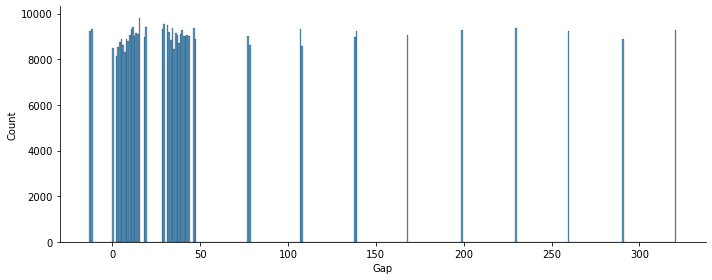

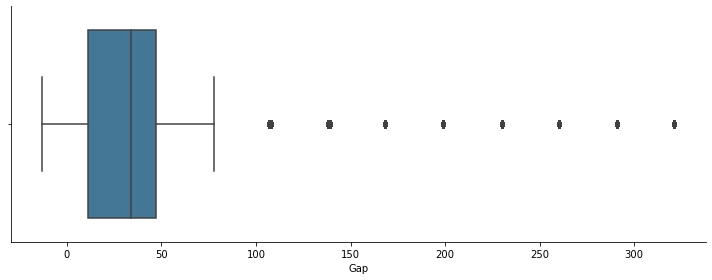

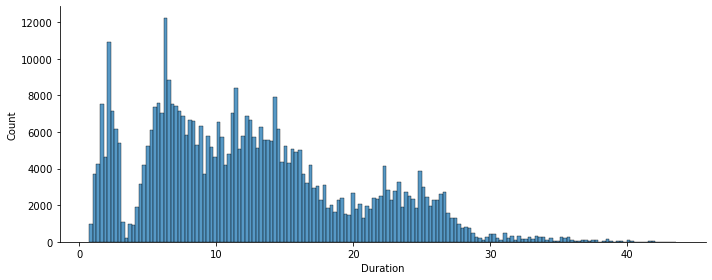

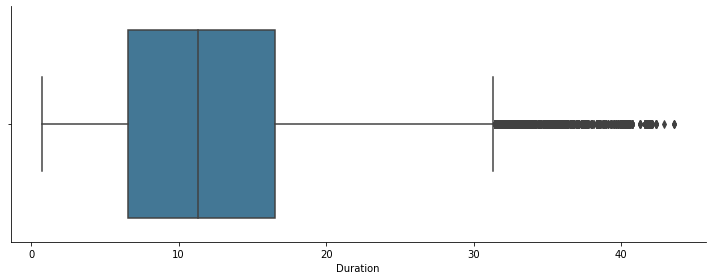

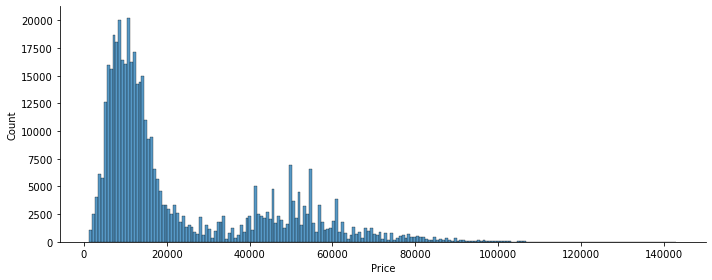

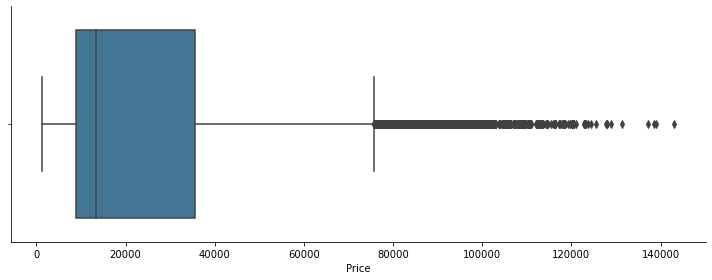

In [30]:
for i in con:
    sns.displot(data=df,x=i,kind='hist',height=4,aspect=2.5,palette='mako')
    sns.catplot(data=df,x=i,kind='box',height=4,aspect=2.5,palette='mako')

#### Observation
- Most bookings are made within a gap of less than 50 days
- Duration of travel for most of the bookings are in between 15-20 hrs
- Prices of most bookings are in between Rs.10000-15000

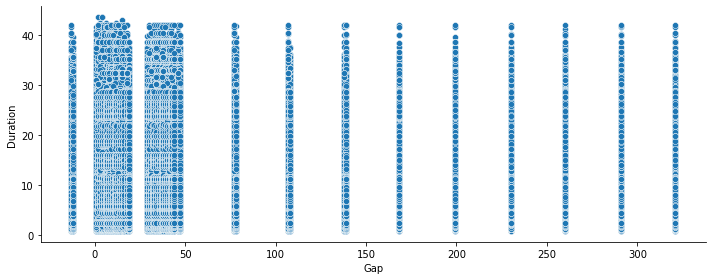

In [31]:
sns.relplot(data=df,x='Gap',y='Duration',height=4,aspect=2.5,palette='mako')

#### Observation
No specific pattern/regularity observed between Duration of travel and Gap between booking and journey

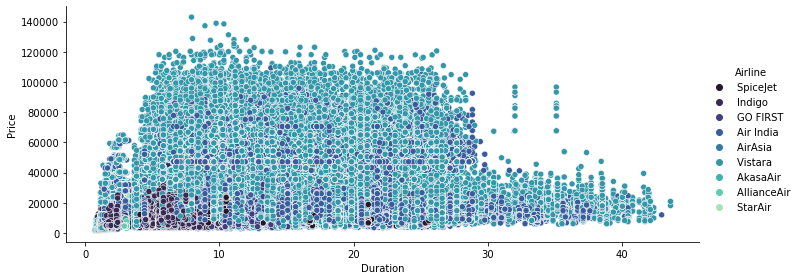

In [32]:
sns.relplot(data=df,x='Duration',y='Price',hue='Airline',height=4,aspect=2.5,palette='mako')

#### Observation
No specific pattern/regularity observed between Price of ticket and Duration of travel

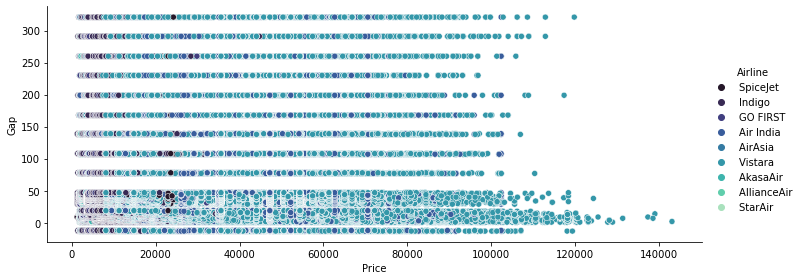

In [33]:
sns.relplot(data=df,x='Price',y='Gap',hue='Airline',height=4,aspect=2.5,palette='mako')

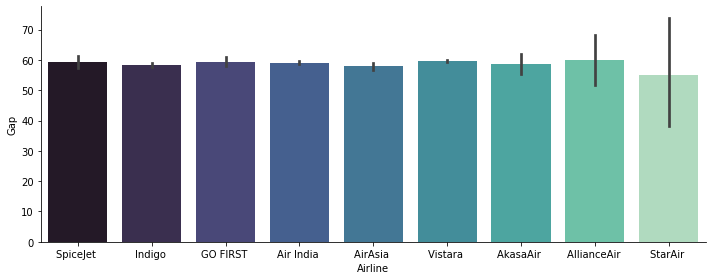

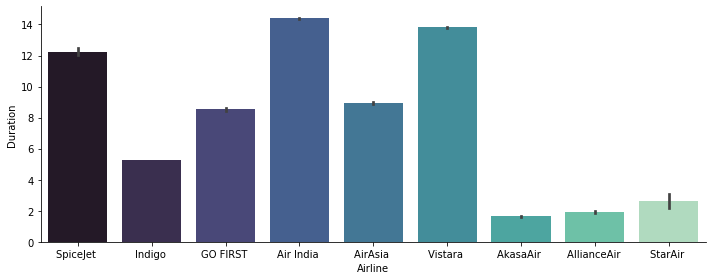

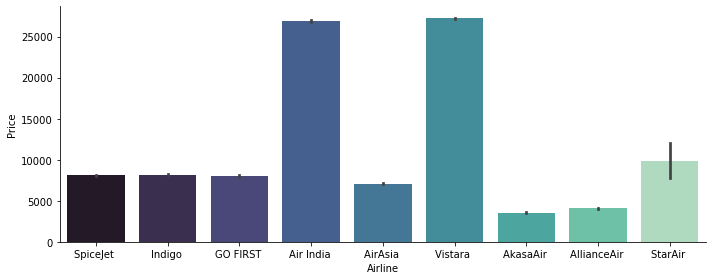

In [34]:
for i in con:
    sns.catplot(data=df,x='Airline',y=i,kind='bar',height=4,aspect=2.5,palette='mako')

#### Observation
- Airline doesn't influence Gap
- AirIndia flies the longest duration and AkasaAir the shortest
- Vistara is the most expensive while AkasaAir the least

In [35]:
pd.crosstab(df['Airline'],df['Departure']).style.background_gradient('Blues')

#### Observation
- Vistara has most flights flying
- Star Air has the least

In [36]:
df.pivot_table(values='Price',index='Departure',columns='Arrival',aggfunc='mean').style.background_gradient('Blues')

#### Observaion
Most flights to-from Kolkata are expensive followed by Mumbai

In [37]:
df.pivot_table(values='Duration',index='Departure',columns='Arrival',aggfunc='mean').style.background_gradient('Blues')

#### Observation
Most flights to-fro Delhi and Mumbai fly in shorter time than others

In [38]:
import statistics as st

In [39]:
df.pivot_table(values='Total_stops',index='Departure',columns='Arrival',aggfunc=st.mode).style.background_gradient('Blues')

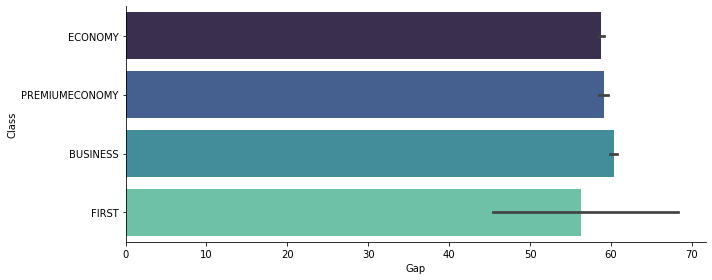

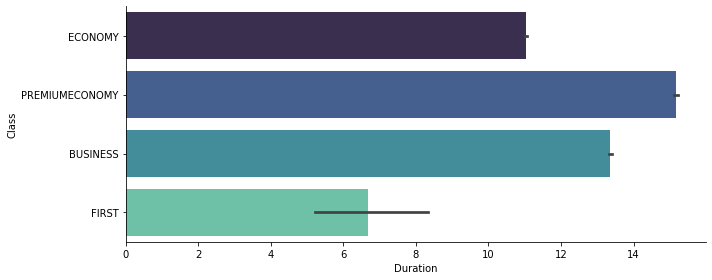

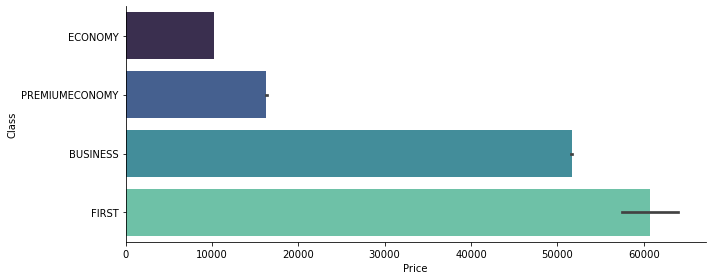

In [40]:
for i in con:
    sns.catplot(data=df,y='Class',x=i,kind='bar',height=4,aspect=2.5,palette='mako')

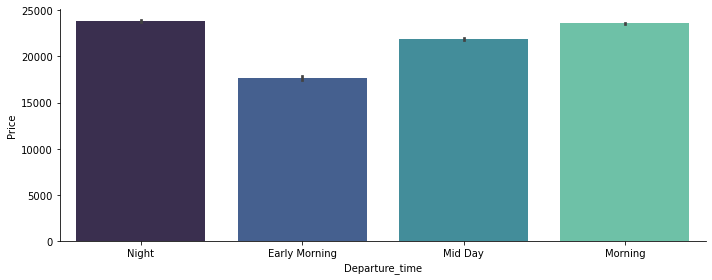

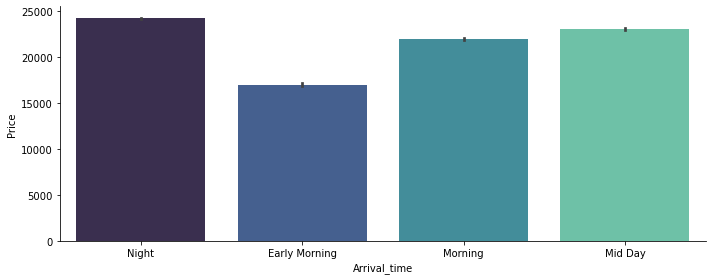

In [41]:
sns.catplot(data=df,x='Departure_time',y='Price',kind='bar',height=4,aspect=2.5,palette='mako')
sns.catplot(data=df,x='Arrival_time',y='Price',kind='bar',height=4,aspect=2.5,palette='mako')

#### Observation
Flights that depart or arrive at early morning are comparitively less expensive

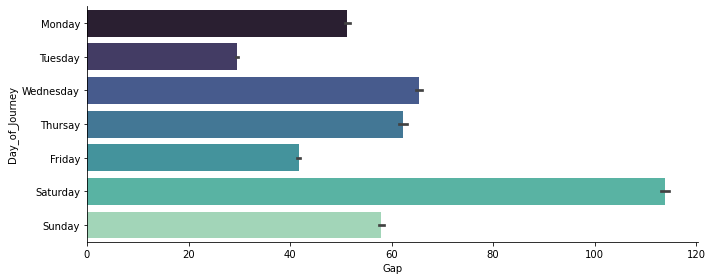

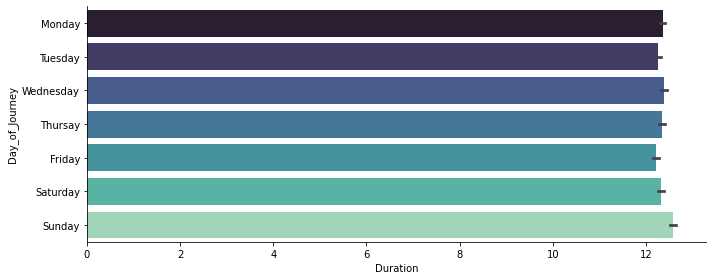

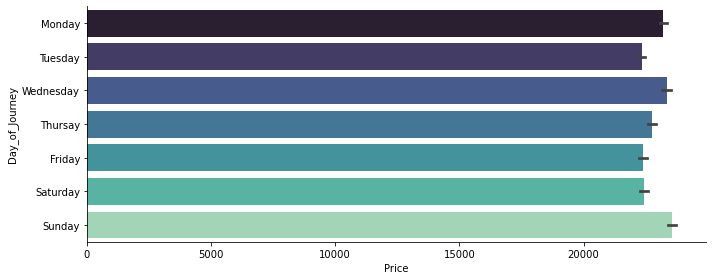

In [42]:
for i in con:
    sns.catplot(data=df,y='Day_of_Journey',x=i,kind='bar',height=4,aspect=2.5,palette='mako')

# Data Preprocessing

In [43]:
dfc = df.copy()
dfc.head()

Day_of_Journey     Airline    Class  Gap Departure_time Departure  \
0         Monday   SpiceJet   ECONOMY    1          Night     Delhi   
1         Monday     Indigo   ECONOMY    1          Night     Delhi   
2         Monday   GO FIRST   ECONOMY    1          Night     Delhi   
3         Monday   SpiceJet   ECONOMY    1          Night     Delhi   
4         Monday  Air India   ECONOMY    1          Night     Delhi   

    Arrival_time Arrival  Duration  Total_stops  Price  
0          Night  Mumbai      2.08            0   5335  
1  Early Morning  Mumbai      2.33            0   5899  
2  Early Morning  Mumbai      2.17            0   5801  
3          Night  Mumbai      2.08            0   5794  
4          Night  Mumbai      2.17            0   5955

In [44]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Day_of_Journey  452088 non-null  object 
 1   Airline         452088 non-null  object 
 2   Class           452088 non-null  object 
 3   Gap             452088 non-null  int64  
 4   Departure_time  452088 non-null  object 
 5   Departure       452088 non-null  object 
 6   Arrival_time    452088 non-null  object 
 7   Arrival         452088 non-null  object 
 8   Duration        452088 non-null  float64
 9   Total_stops     452088 non-null  int64  
 10  Price           452088 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 37.9+ MB


### Feature Engineering

In [45]:
from sklearn import preprocessing

In [46]:
encoder = preprocessing.LabelEncoder()
for col in dfc.select_dtypes(include=object).columns:
    dfc[col] = encoder.fit_transform(dfc[col])

In [47]:
dfc.head()

Day_of_Journey  Airline  Class  Gap  Departure_time  Departure  \
0               1        6      1    1               3          3   
1               1        5      1    1               3          3   
2               1        4      1    1               3          3   
3               1        6      1    1               3          3   
4               1        0      1    1               3          3   

   Arrival_time  Arrival  Duration  Total_stops  Price  
0             3        6      2.08            0   5335  
1             0        6      2.33            0   5899  
2             0        6      2.17            0   5801  
3             3        6      2.08            0   5794  
4             3        6      2.17            0   5955

### Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
dfc= pd.DataFrame(scaler.fit_transform(dfc.values), columns=dfc.columns)

In [50]:
dfc.head()

Day_of_Journey   Airline     Class       Gap  Departure_time  Departure  \
0       -0.951569  0.277375 -0.044751 -0.742713        1.259666   -0.07664   
1       -0.951569 -0.012795 -0.044751 -0.742713        1.259666   -0.07664   
2       -0.951569 -0.302964 -0.044751 -0.742713        1.259666   -0.07664   
3       -0.951569  0.277375 -0.044751 -0.742713        1.259666   -0.07664   
4       -0.951569 -1.463642 -0.044751 -0.742713        1.259666   -0.07664   

   Arrival_time  Arrival  Duration  Total_stops     Price  
0      0.955029  1.42607  -1.38185    -2.246057 -0.861983  
1     -2.155531  1.42607  -1.34821    -2.246057 -0.834211  
2     -2.155531  1.42607  -1.36974    -2.246057 -0.839036  
3      0.955029  1.42607  -1.38185    -2.246057 -0.839381  
4      0.955029  1.42607  -1.36974    -2.246057 -0.831453

### Feature Selection

In [51]:
dfc.corr().style.background_gradient('Blues')

### Data splitting

In [52]:
x = dfc.drop('Price',axis=1)
y = dfc['Price']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [55]:
print('training:',x_train.shape,y_train.shape)
print('testing: ',x_test.shape,y_test.shape)

training: (316461, 10) (316461,)
testing:  (135627, 10) (135627,)


# Modeling

In [56]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [57]:
model_accuracy = pd.DataFrame(columns=['Training','Testing'])

### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Training accuracy: {:.3f}'.format(lr.score(x_train,y_train)))

Training accuracy: 0.393


Training accuracy too poor to check for testing accuracy

In [60]:
model_accuracy.loc['Linear Regression'] = [lr.score(x_train,y_train),None]

### Ridge

In [61]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [62]:
error = dict()
for i in np.arange(-2,5,0.5):
    scores = cross_val_score(Ridge(alpha=i),x_train,y_train,cv=3)
    error[i] = scores.mean()
print('alpha for min error: {:.1f}'.format(max(error,key=lambda i:error[i])))

alpha for min error: 4.5


In [63]:
r = Ridge(alpha=4.5)
r.fit(x_train,y_train)
print('Training accuracy: {:.3f}'.format(r.score(x_train,y_train)))

Training accuracy: 0.393


Training accuracy too poor to check for testing accuracy

In [64]:
model_accuracy.loc['Ridge'] = [r.score(x_train,y_train),None]

### Decision Tree

In [65]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [66]:
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)
print('Training accuracy: {:.3f}'.format(tree.score(x_train,y_train)))

Training accuracy: 0.999


In [67]:
y_tree = tree.predict(x_test)
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_tree)))
print('r2_score:',r2_score(y_test,y_tree))

Root mean squared error: 0.29860961909715944
r2_score: 0.9108531759932762


In [68]:
model_accuracy.loc['Decision Tree'] = [tree.score(x_train,y_train),tree.score(x_test,y_test)]

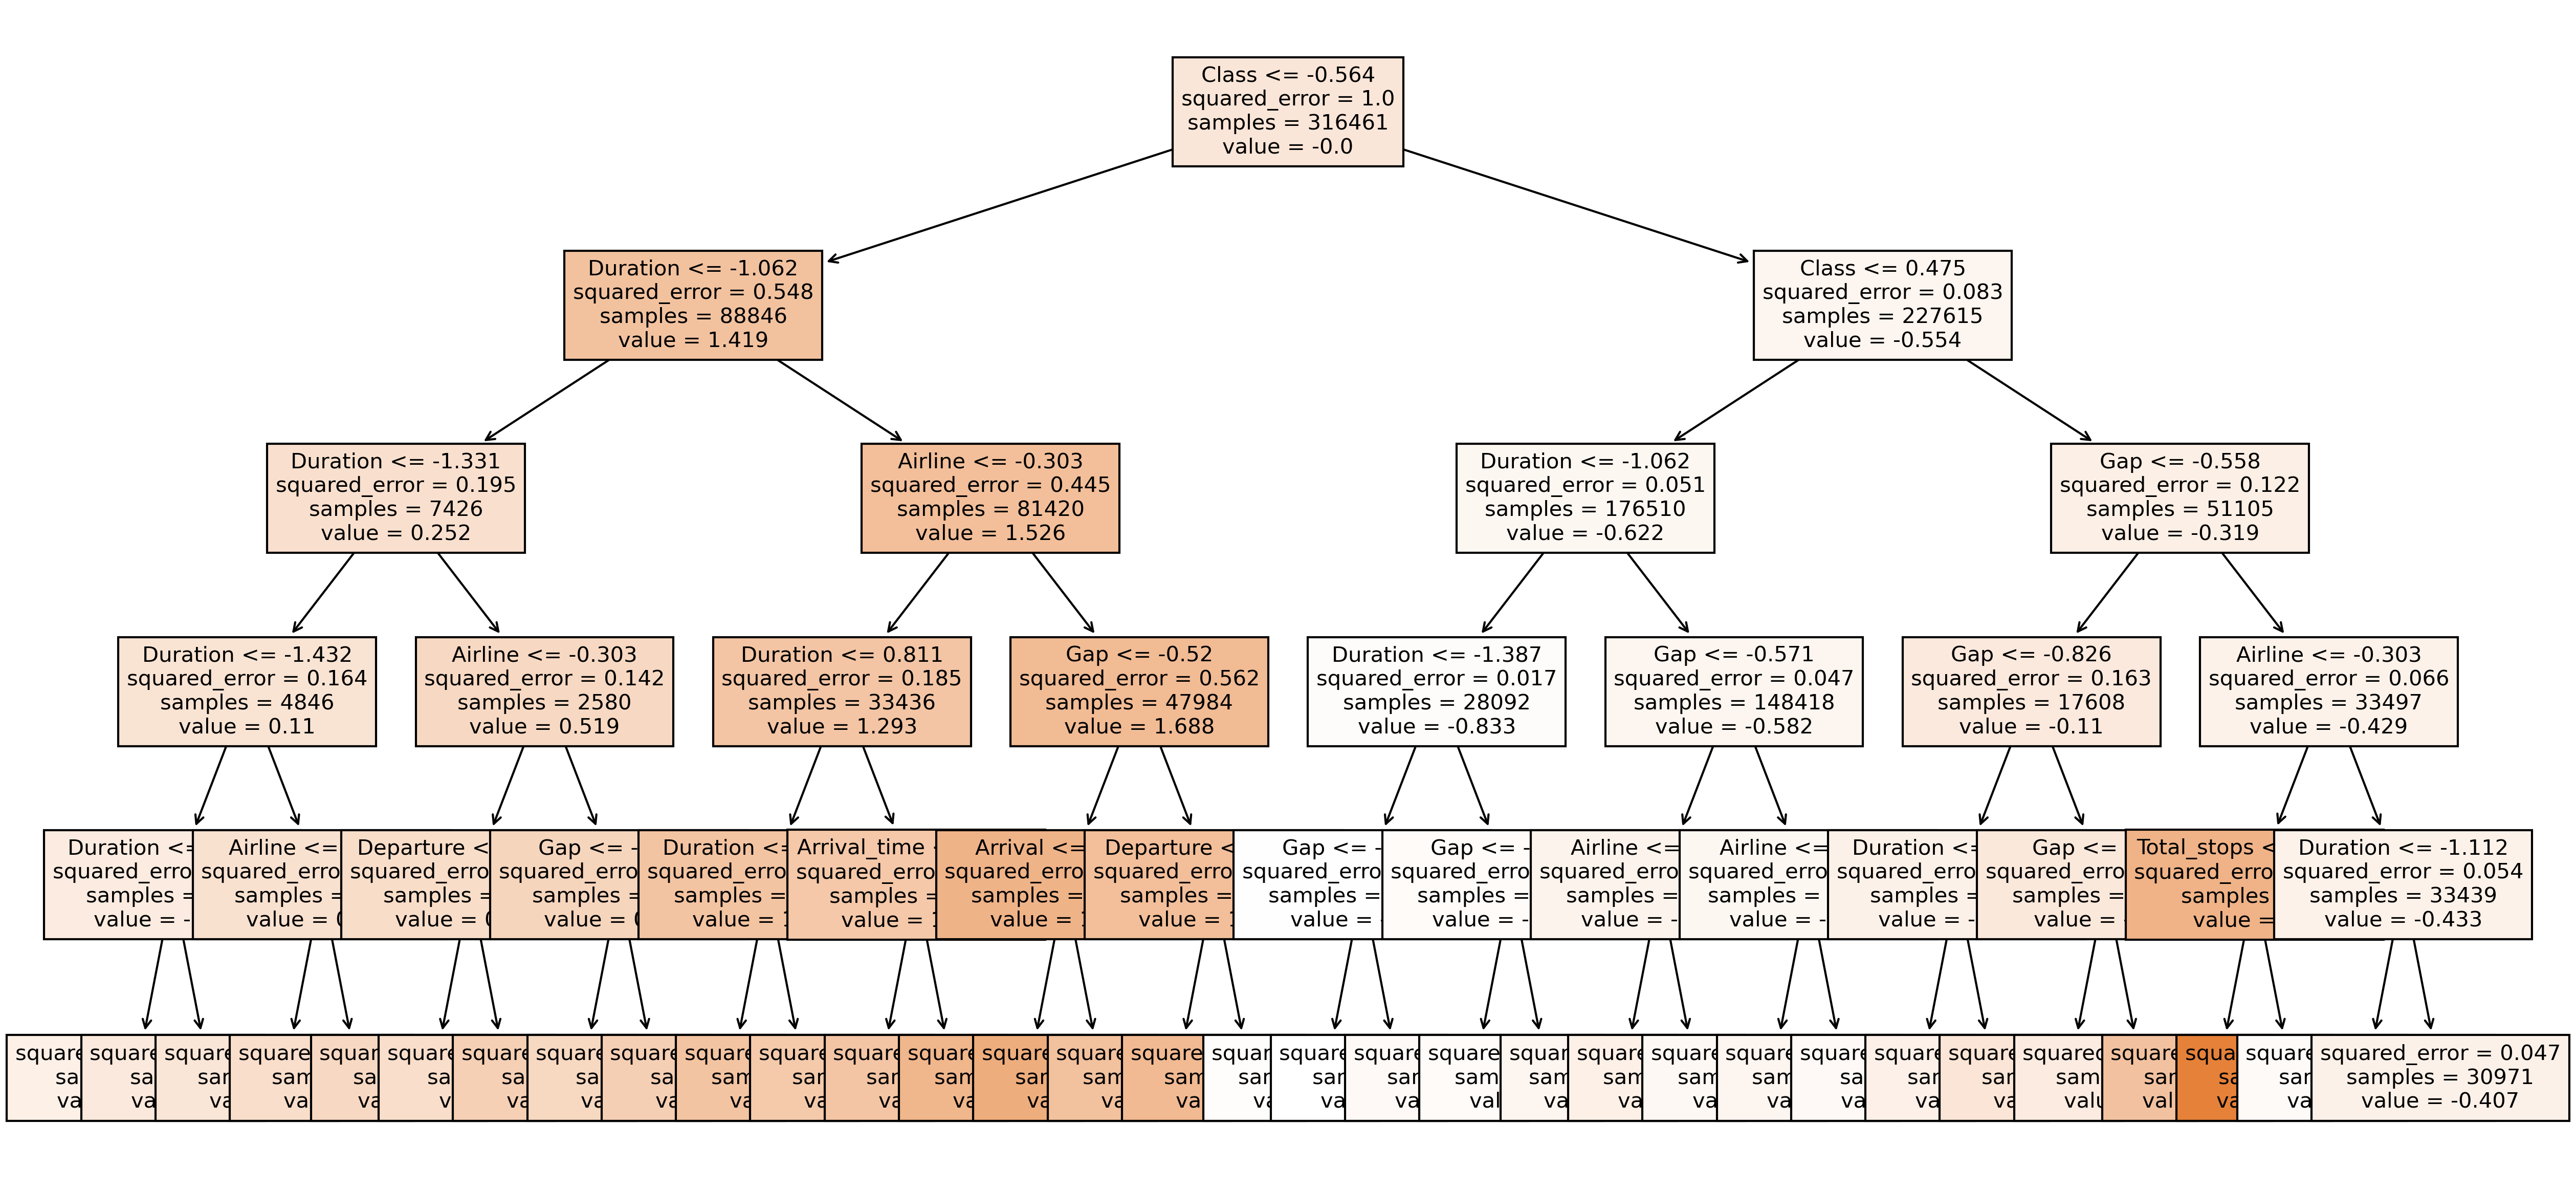

In [69]:
plt.figure(figsize=(20,10),dpi=300)
plot_tree(DecisionTreeRegressor(max_depth=5).fit(x_train,y_train),fontsize=10,feature_names=x_train.columns,filled=True);

In [70]:
imp_tree = permutation_importance(tree,x_test,y_tree)
imp_tree = pd.DataFrame({'Feature':x_train.columns,'Importance':imp_tree.importances_mean})
display(imp_tree.sort_values(by='Importance',ascending=False)[:3])

Feature  Importance
2     Class    1.764448
8  Duration    0.279889
3       Gap    0.164060

### Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [72]:
forest = RandomForestRegressor()

params = {'max_depth':range(3,len(dfc.columns),2),'n_estimators':range(5,12,2)}
best_forest = GridSearchCV(estimator=forest,param_grid=params,scoring='r2',n_jobs=-1)

best_forest.fit(x_train,y_train)
print('Best Random Foresst:', best_forest.best_estimator_)
print('Training accuracy:',best_forest.score(x_train,y_train))

Best Random Foresst: RandomForestRegressor(max_depth=9, n_estimators=9)
Training accuracy: 0.9046000872471309


In [73]:
y_forest = best_forest.predict(x_test)
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_forest)))
print('r2_score:',r2_score(y_test,y_forest))

Root mean squared error: 0.31153601355973704
r2_score: 0.9029680397792804


In [74]:
model_accuracy.loc['Random Forest'] = [best_forest.score(x_train,y_train),r2_score(y_test,y_forest)]

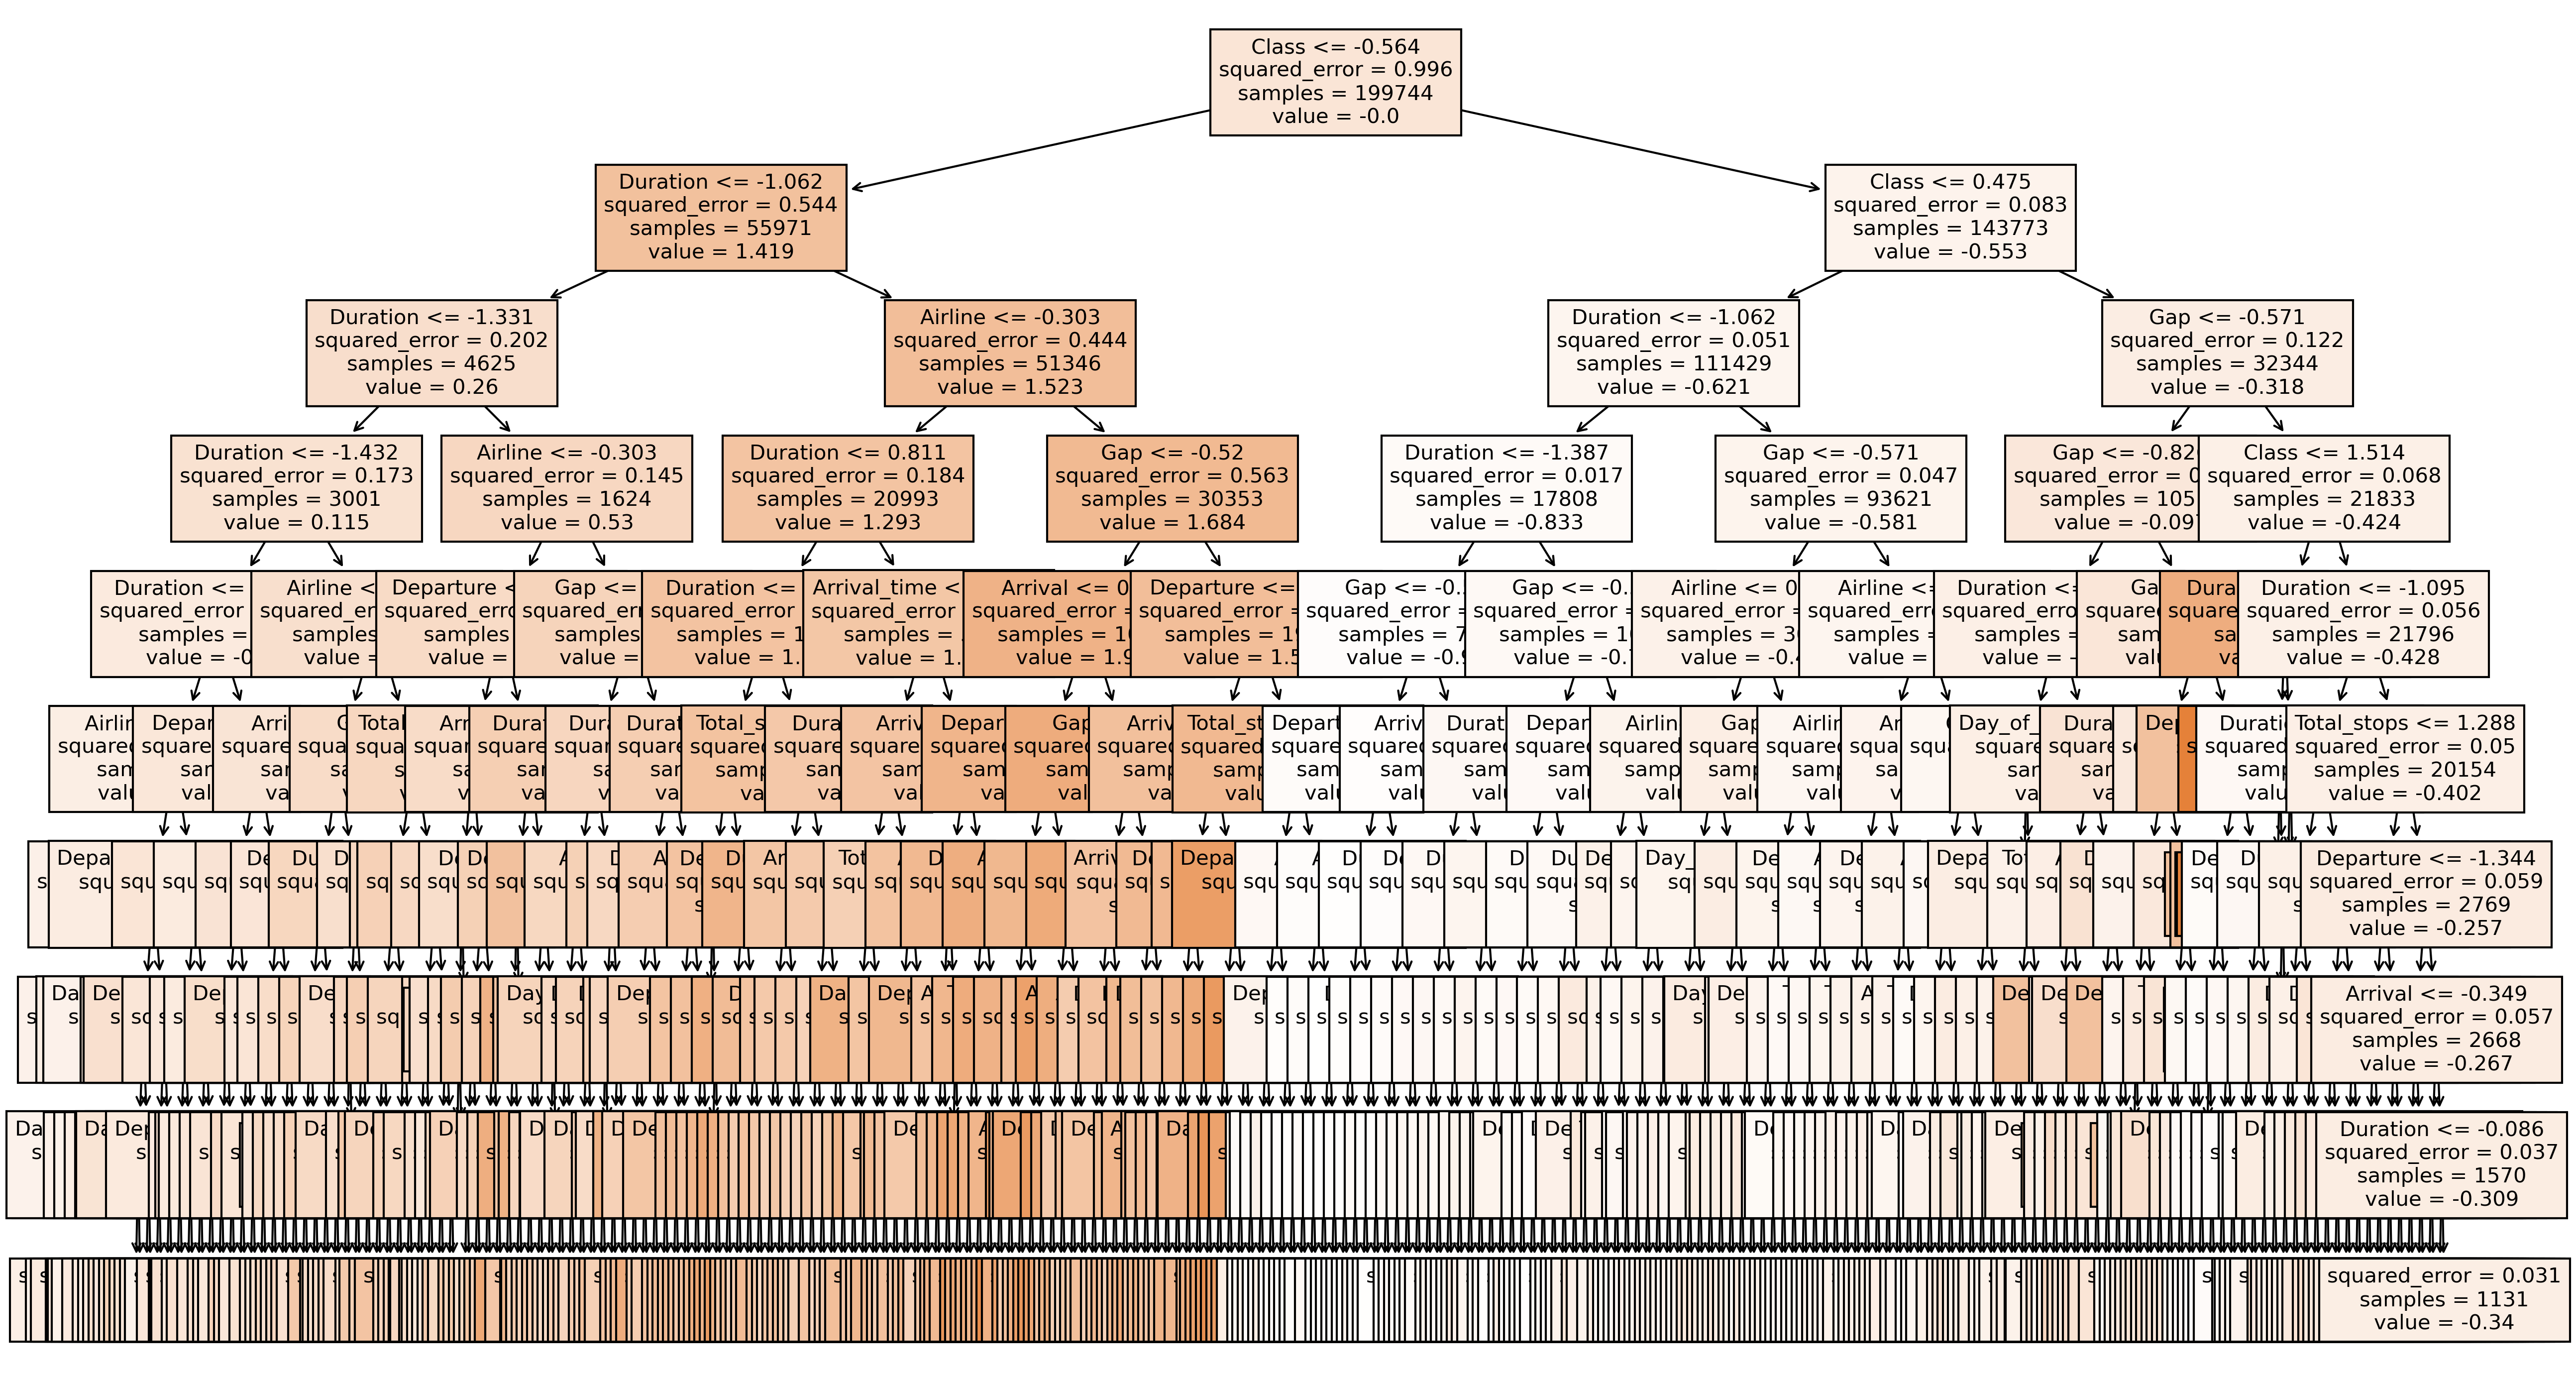

In [75]:
plt.figure(figsize=(20,12),dpi=300)
plot_tree(RandomForestRegressor(max_depth=9,n_estimators=9).fit(x_train,y_train).estimators_[0],
               fontsize=10,filled=True,feature_names=x_train.columns);

In [76]:
imp_forest = permutation_importance(best_forest,x_test,y_forest)
imp_forest = pd.DataFrame({'Feature':x_train.columns,'Importance':imp_forest.importances_mean})
display(imp_forest.sort_values(by='Importance',ascending=False)[:3])

Feature  Importance
2     Class    1.880549
1   Airline    0.178103
8  Duration    0.129411

### AdaBoost Regressor

In [77]:
from sklearn.ensemble import AdaBoostRegressor

In [78]:
boost = AdaBoostRegressor(n_estimators=9,random_state=1)
boost.fit(x_train,y_train)
print('Training accuray:',boost.score(x_train,y_train))

Training accuray: 0.853150003142885


In [79]:
y_boost = boost.predict(x_test)
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_boost)))
print('r2_score:',r2_score(y_test,y_boost))

Root mean squared error: 0.38456178996957474
r2_score: 0.8521468609215952


In [80]:
model_accuracy.loc['AdaBoost'] = [boost.score(x_train,y_train),r2_score(y_test,y_boost)]

In [81]:
imp_boost = permutation_importance(boost,x_test,y_boost)
imp_boost = pd.DataFrame({'Feature':x_train.columns,'Importance':imp_boost.importances_mean})
display(imp_boost.sort_values(by='Importance',ascending=False)[:3])

Feature  Importance
2     Class    1.908093
8  Duration    0.104038
1   Airline    0.022945

# Conclusion

In [82]:
model_accuracy

Training   Testing
Linear Regression  0.393245       NaN
Ridge              0.393245       NaN
Decision Tree      0.998908  0.910853
Random Forest      0.904600  0.902968
AdaBoost           0.853150  0.852147

Decision Tree Regressor has the highest training and testing accuracies. Hence, it is comparitively the best predictive model for flight prediction

In [83]:
imp_tree.sort_values(by='Importance',ascending=0)[:5]

Feature  Importance
2      Class    1.764448
8   Duration    0.279889
3        Gap    0.164060
5  Departure    0.162118
7    Arrival    0.153655

#### Top 5 features that influence the price of the ticket:
1. Class
2. Airline
3. Duration
4. Gap
5. Departure(place) 

#### From EDA it can also be stated that:
1. Economy is the most inexpensive class
2. AkaskaAir is the most inexpensive airline